## Continuous system での Lyapunov exponentsの計算


以下のノートは https://gist.github.com/tkf/014787f386e99b7b8b42683cfbd8da01 を参考にして作成した

### Lyapunov exponentsの定義

以下の非線形力学系を考える

\begin{align}
  \frac{d {\bf x}(t)}{d t}=f({\bf x(t}, t)
\end{align}

微小変異$\delta {\bf x}(t)$の発展方程式は、上の$f({\bf x(t}, t)$を線形化したヤコビ行列$\mathbf{J}({\bf x}(t))$で書ける

\begin{align}
  \frac{d \delta {\bf x}(t)}{d t}=\mathbf{J}({\bf x}(t)) \delta {\bf x}(t)
\end{align}

Lyapunov exponentsとは、この微小変異空間(tanget space)における平均的な体積変異。体積素片を定義するベクトルからなる行列を${\bf P}({\bf x})$とすると、以下のように定義される：




In [270]:
using DifferentialEquations
using ForwardDiff
using LinearAlgebra
using Plots

In [282]:
# 問題の定義

function lorenz!(du,u)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8.0/3.0)*u[3]
    
end

function lorenz_jacobian!(J, u)
    J[1, 1] = -10.0
    J[1, 2] = 10.0
    J[1, 3] = 0.0
    J[2, 1] = 28.0-u[3]
    J[2, 2] = -1.0
    J[2, 3] = -u[1]
    J[3, 1] = u[2]
    J[3, 2] = u[1]
    J[3, 3] = -(8.0/3.0)
    J
end

lorenz_jacobian! (generic function with 1 method)

In [245]:
u0 = [0.9; 0.9; 0.0]
tspan = (0.0, 10.0)

prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob, save_everystep=false, abstol=1e-10, reltol=1e-10)

u0 = sol(sol.prob.tspan[end])
tspan = (0.0,100.0)

prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob, saveat=0.01, abstol=1e-10, reltol=1e-10)

retcode: Success
Interpolation: 1st order linear
t: 10001-element Array{Float64,1}:
   0.0 
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1 
   0.11
   0.12
   ⋮   
  99.89
  99.9 
  99.91
  99.92
  99.93
  99.94
  99.95
  99.96
  99.97
  99.98
  99.99
 100.0 
u: 10001-element Array{Array{Float64,1},1}:
 [-6.01067, -6.70358, 22.9115]   
 [-6.08838, -6.94914, 22.716]    
 [-6.1827, -7.20784, 22.5467]    
 [-6.29328, -7.47908, 22.4054]   
 [-6.41973, -7.76216, 22.2938]   
 [-6.56162, -8.05616, 22.2136]   
 [-6.71847, -8.35998, 22.1669]   
 [-6.88972, -8.67225, 22.1553]   
 [-7.07474, -8.99129, 22.1808]   
 [-7.27276, -9.31507, 22.2451]   
 [-7.48288, -9.64119, 22.3499]   
 [-7.70403, -9.96681, 22.4965]   
 [-7.93498, -10.2887, 22.6861]   
 ⋮                               
 [-0.0885653, -0.958946, 19.0672]
 [-0.171446, -0.961387, 18.5667] 
 [-0.24707, -0.972061, 18.0801]  
 [-0.316911, -0.990967, 17.6071] 
 [-0.382304, -1.01813, 17.1473]  
 [-0.444461, -1.05

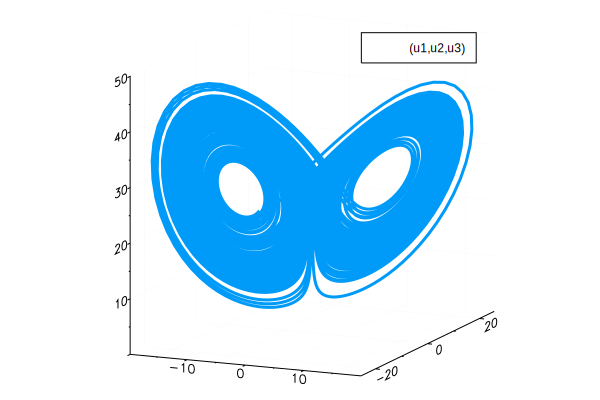

In [271]:
plot(sol,vars=(1,2,3))

In [246]:
sol[1]

3-element Array{Float64,1}:
 -6.010665694765995 
 -6.7035834459619785
 22.911526227938868 

In [281]:
function lorenz(u)
 du = zeros(Float64, 3)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8.0/3.0)*u[3]
 du
end

function lorenz_jacobian(u)
    J = zeros(Float64, (3, 3))
    J[1, 1] = -10.0
    J[1, 2] = 10.0
    J[1, 3] = 0.0
    J[2, 1] = 28.0-u[3]
    J[2, 2] = -1.0
    J[2, 3] = -u[1]
    J[3, 1] = u[2]
    J[3, 2] = u[1]
    J[3, 3] = -(8.0/3.0)
    J
end

lorenz_jacobian (generic function with 1 method)

In [259]:
lorenz_jacobian(sol[1])

3×3 Array{Float64,2}:
 -10.0      10.0       0.0    
   5.08847  -1.0       6.01067
  -6.70358  -6.01067  -2.66667

In [260]:
y = zeros(Float64, 3)
J = ForwardDiff.jacobian(lorenz!, y, sol[1])

3×3 Array{Float64,2}:
 -10.0      10.0       0.0    
   5.08847  -1.0       6.01067
  -6.70358  -6.01067  -2.66667

In [261]:
using LinearAlgebra
F = qr(J)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.765098  -0.585071   0.268917
  0.389318  -0.0876651  0.916922
 -0.51289    0.80623    0.294851
R factor:
3×3 Array{Float64,2}:
 13.0702   -4.95749   3.70777
  0.0     -10.609    -2.67687
  0.0       0.0       4.72504

In [262]:
F.Q * F.R

3×3 Array{Float64,2}:
 -10.0      10.0       1.33227e-15
   5.08847  -1.0       6.01067    
  -6.70358  -6.01067  -2.66667    

In [263]:
delta_t = 0.01
nframe = length(sol.t)

10001

In [278]:
y = zeros(Float64, 3)
r = zeros(Float64, 3)
lyapunov_exponent = zeros(nframe, 3)

for iframe in 1:nframe
    u = sol[iframe]
    J = ForwardDiff.jacobian(lorenz!, y, u)
    #J = lorenz_jacobian(u)
    
    F = qr(J)
    signR = diag(F.R) .< 0.0
    Q = Matrix(F.Q)
    R = Matrix(F.R)
    for j in 1:3
        if signR[j]
            Q[:, j] .= Q[:, j] .* -1.0
            R[j, :] .= R[j, :] .* -1.0
        end
    end
    
    #println(log.(diag(R)))
    #r = r .+ log.(abs.(diag(F.R)))
    r = r .+ log.(diag(R))
    lyapunov_exponent[iframe, :] .= r ./ iframe
end

In [279]:
lyapunov_exponent[end, :]

3-element Array{Float64,1}:
 2.744392326896693 
 2.2105433290104606
 1.2008936552743066

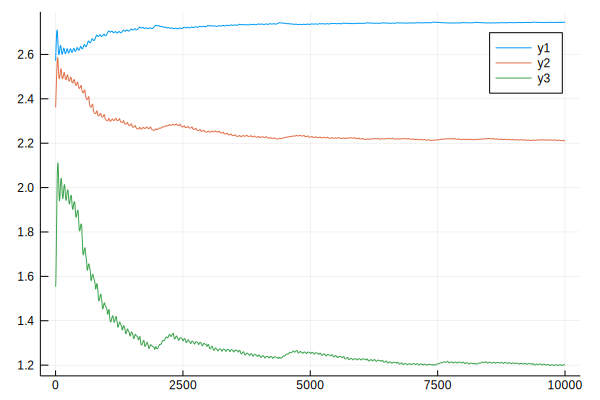

In [273]:
plot(lyapunov_exponent)

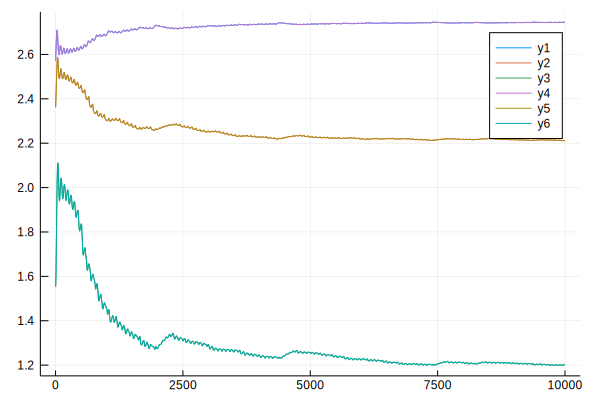

In [276]:
plot!(lyapunov_exponent)

In [298]:
function tangent_dynamics!(du, u, p, t)
    lorenz!((@view du[:, 1]), u[:, 1])
    J = lorenz_jacobian(u[:, 1])
    mul!((@view du[:, 2:end]), J, u[:, 2:end])
    du
end

tangent_dynamics! (generic function with 2 methods)

In [299]:
u0 = [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
du = zeros(Float64, (3, 4))
tangent_dynamics!(du, u0)

3×4 Array{Float64,2}:
  0.0   -10.0  10.0   0.0    
 24.3    28.0  -1.0  -0.9    
  0.81    0.9   0.9  -2.66667

In [300]:
u0 = [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
tspan = (0.0,100.0)

prob = ODEProblem(tangent_dynamics!, u0, tspan)
sol = solve(prob, saveat=0.01, abstol=1e-10, reltol=1e-10)

retcode: Success
Interpolation: 1st order linear
t: 10001-element Array{Float64,1}:
   0.0 
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1 
   0.11
   0.12
   ⋮   
  99.89
  99.9 
  99.91
  99.92
  99.93
  99.94
  99.95
  99.96
  99.97
  99.98
  99.99
 100.0 
u: 10001-element Array{Array{Float64,2},1}:
 [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]                                                                                    
 [0.911741 0.917922 0.0951214 -0.000431995; 1.14285 0.266256 1.00349 -0.00891566; 0.00911796 0.0108372 0.00942464 0.973644]             
 [0.945615 0.867898 0.182763 -0.00167421; 1.38959 0.511387 1.03222 -0.0179623; 0.0204672 0.0252476 0.0202326 0.947888]                  
 [1.00017 0.845284 0.265936 -0.00368217; 1.6461 0.743791 1.08422 -0.0275489; 0.034484 0.0434097 0.033212 0.922687]                      
 [1.07465 0.846617 0.347219 -0.0064526; 1.91786 0.970632 1.15833 -0.0380475; 0.0518003 0.0658866 0.0491986 0.897983]

In [343]:
twindow = 1.0
niterate = 1000
y = zeros(Float64, 3)
r = zeros(Float64, 3)
lyapunov_exponent = zeros(niterate, 3)

u0 = [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
prob = ODEProblem(tangent_dynamics!, u0, (0, 100))
u0 = sol[end]
u0[:, 2:end] = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0];

tspan = (0.0, twindow)

for iiterate in 1:niterate
    prob = ODEProblem(tangent_dynamics!, u0, tspan)
    sol = solve(prob, save_everystep=false, abstol=1e-10, reltol=1e-10)
    P = sol[end][:, 2:end]
    
    F = qr(P)
    signR = diag(F.R) .< 0.0
    Q = Matrix(F.Q)
    R = Matrix(F.R)
    for j in 1:3
        if signR[j]
            Q[:, j] .= Q[:, j] .* -1.0
            R[j, :] .= R[j, :] .* -1.0
        end
    end
    
    #println(log.(diag(R)))
    #r = r .+ log.(abs.(diag(F.R)))
    r = r .+ log.(diag(R))
    lyapunov_exponent[iiterate, :] .= r ./ (twindow*iiterate)
    
    u0 = sol[end]
    #u0[:, 2:end] = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0];
    u0[:, 2:end] = Q;
    #println(u0)
end

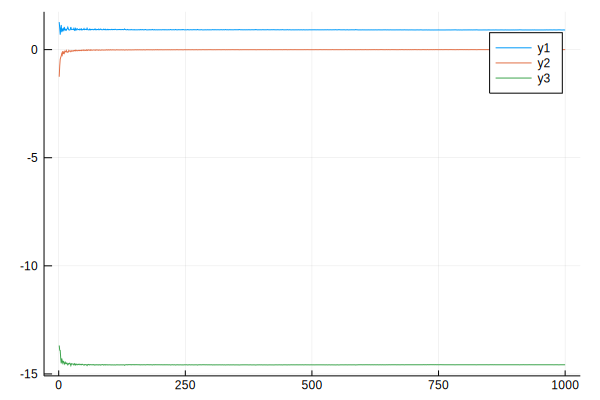

In [344]:
plot(lyapunov_exponent)

In [342]:
lyapunov_exponent[end, :]

3-element Array{Float64,1}:
  0.8537496807715588 
 -0.10705524759722719
 -2.6619845008157093 